![Sentiment Analysis GIF](https://miro.medium.com/v2/resize:fit:1280/1*TxNDsw1op7sxikKd6Sk08w.gif)
# **TweetSense: Sentiment Analysis on Twitter Data Using TextBlob**

# Introduction

## Understanding Public Sentiment through Social Media Analysis

In today’s digital age, platforms like Twitter serve as dynamic arenas where public opinion is expressed instantly and prolifically. This project focuses on analyzing sentiment patterns in social media data to understand attitudes toward specific topics or brands. By leveraging NLP techniques and visual analytics, we aim to uncover:

- The distribution of sentiment polarity across tweets
- How public mood varies by topic, using keyword filtering
- Discrepancies between human-labeled sentiment and algorithmic predictions

### Objectives of the Project:
1. Load and preprocess Twitter datasets
2. Apply sentiment scoring using TextBlob
3. Categorize tweets into positive, negative, or neutral sentiments
4. Visualize sentiment distributions using Seaborn and Matplotlib
5. Filter tweets by topic keywords for targeted insight

To ensure smooth performance and efficient experimentation, the dataset is limited to a manageable number of tweets. This framework provides a scalable foundation for tracking brand reputation, political discourse, and real-time public reactions.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
#import seaborn as sns


In [4]:
train_df = pd.read_csv('twitter_training.csv')
val_df = pd.read_csv('twitter_validation.csv')


In [5]:
print(train_df.head())
print(train_df.columns)


   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...     
Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')


### Loading the Twitter Training Dataset with Custom Column Names

In this step, we define proper column names for the dataset and load the CSV file using `pandas`.

- **`column_names`**: A list that specifies the headers for each column in the dataset:
  - `tweet_id`: Unique identifier for each tweet.
  - `topic`: The subject or theme of the tweet.
  - `label`: The sentiment or classification label (e.g., positive, negative, neutral).
  - `text`: The actual tweet content.

- **`pd.read_csv()`**: We use this function to load the dataset. Since the CSV file may not have a header row, we assign our own custom column names using the `names` parameter.


In [7]:
# Define proper column names
column_names = ['tweet_id', 'topic', 'label', 'text']

# Load CSV with custom headers
train_df = pd.read_csv('twitter_training.csv', names=column_names)


### Sentiment Analysis Using TextBlob

In this section, we analyze the sentiment of each tweet using the **TextBlob** library and compare the predicted sentiment to the original label.

---

#### Step 1: Analyze Sentiment Score

We define a function `analyze_sentiment()` that takes the tweet text as input and returns a **sentiment polarity score** between -1 (very negative) and 1 (very positive).


In [8]:
def analyze_sentiment(text):
    return TextBlob(str(text)).sentiment.polarity

train_df['sentiment_score'] = train_df['text'].apply(analyze_sentiment)

# Categorize TextBlob score into discrete sentiment
def categorize(score):
    if score > 0.1:
        return 'Positive'
    elif score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

train_df['predicted_label'] = train_df['sentiment_score'].apply(categorize)

# Compare predictions to original labels
mismatches = train_df[train_df['label'] != train_df['predicted_label']]
print("Label Mismatches:\n", mismatches.head())


Label Mismatches:
    tweet_id        topic     label  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   

                                                text  sentiment_score  \
0  im getting on borderlands and i will murder yo...              0.0   
1  I am coming to the borders and I will kill you...              0.0   
2  im getting on borderlands and i will kill you ...              0.0   
3  im coming on borderlands and i will murder you...              0.0   
4  im getting on borderlands 2 and i will murder ...              0.0   

  predicted_label  
0         Neutral  
1         Neutral  
2         Neutral  
3         Neutral  
4         Neutral  


### Visualizing Sentiment Scores and Categories

This section focuses on visualizing sentiment scores, sentiment categories, and analyzing sentiment distribution for a specific topic using the `TextBlob` sentiment polarity.

---


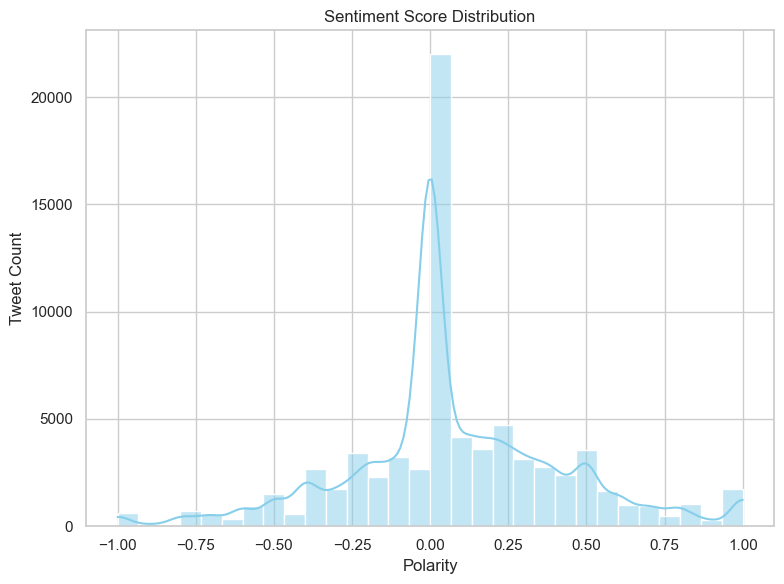

C:\Users\A\AppData\Local\Temp\ipykernel_18056\3246877577.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x='sentiment_category', palette='Set2')


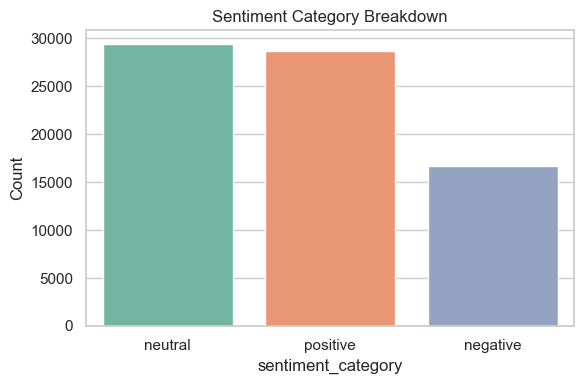

C:\Users\A\AppData\Local\Temp\ipykernel_18056\3246877577.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=topic_tweets, x='sentiment_category', palette='Set3')


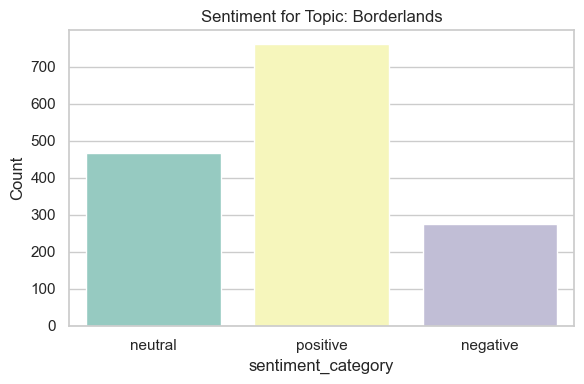

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

# Optional: Configure plot aesthetics
sns.set(style='whitegrid')

# Sentiment score distribution
plt.figure(figsize=(8, 6))
sns.histplot(train_df['sentiment_score'], bins=30, kde=True, color='skyblue')
plt.title('Sentiment Score Distribution')
plt.xlabel('Polarity')
plt.ylabel('Tweet Count')
plt.tight_layout()
plt.show()

# Categorize sentiment
def categorize(score):
    if score > 0.1:
        return 'positive'
    elif score < -0.1:
        return 'negative'
    else:
        return 'neutral'

train_df['sentiment_category'] = train_df['sentiment_score'].apply(categorize)

# Sentiment category breakdown
plt.figure(figsize=(6, 4))
sns.countplot(data=train_df, x='sentiment_category', palette='Set2')
plt.title('Sentiment Category Breakdown')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Topic-based sentiment distribution (replace 'your_keyword')
keyword = 'borderlands'  # Example: change this to your actual topic
topic_tweets = train_df[train_df['text'].str.contains(keyword, case=False, na=False)]

plt.figure(figsize=(6, 4))
sns.countplot(data=topic_tweets, x='sentiment_category', palette='Set3')
plt.title(f'Sentiment for Topic: {keyword.capitalize()}')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


#### Import Required Libraries

We import necessary Python libraries:

- `pandas` for data manipulation
- `matplotlib.pyplot` and `seaborn` for plotting
- `TextBlob` for sentiment analysis

---


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

# Plot aesthetics
sns.set(style='whitegrid')


### Load a Subset of Tweets for Faster Processing

To improve performance during development or testing, we load only a limited number of rows from the dataset.

- `tweet_limit`: Defines the number of rows (tweets) to read from the file.
- `column_names`: Specifies custom headers for the dataset.
- `nrows`: A parameter in `pd.read_csv()` that restricts how many rows are read.

In [11]:
# Set tweet limit for faster analysis
tweet_limit = 1000

column_names = ['tweet_id', 'topic', 'label', 'text']
train_df = pd.read_csv('twitter_training.csv', names=column_names, nrows=tweet_limit)


### Sentiment Analysis Using TextBlob

We use the `TextBlob` library to calculate the **sentiment polarity** of each tweet. The polarity score ranges from **-1 (very negative)** to **1 (very positive)**.

---

#### Step: Define Sentiment Analysis Function

We define a function `analyze_sentiment()` that takes a piece of text and returns its polarity score using `TextBlob`.


In [12]:
def analyze_sentiment(text):
    return TextBlob(str(text)).sentiment.polarity

train_df['sentiment_score'] = train_df['text'].apply(analyze_sentiment)



### Categorizing Sentiment Scores into Labels

After calculating sentiment polarity scores for each tweet, we convert these numerical values into **categorical sentiment labels**: `positive`, `negative`, or `neutral`.

---

#### Step: Define Categorization Function

The function `categorize()` maps polarity scores to sentiment categories based on the following thresholds:

- Score > 0.1 → `positive`
- Score < -0.1 → `negative`
- Else → `neutral`

In [13]:
def categorize(score):
    if score > 0.1:
        return 'positive'
    elif score < -0.1:
        return 'negative'
    else:
        return 'neutral'

train_df['sentiment_category'] = train_df['sentiment_score'].apply(categorize)


### Visualizing the Sentiment Score Distribution

To understand the overall sentiment of the tweets, we visualize the distribution of **sentiment polarity scores** using a histogram.

- The **x-axis** represents the polarity scores ranging from -1 (negative) to 1 (positive).
- The **y-axis** shows the number of tweets corresponding to each score range.
- The **KDE (Kernel Density Estimate)** curve helps visualize the probability density of the sentiment scores.


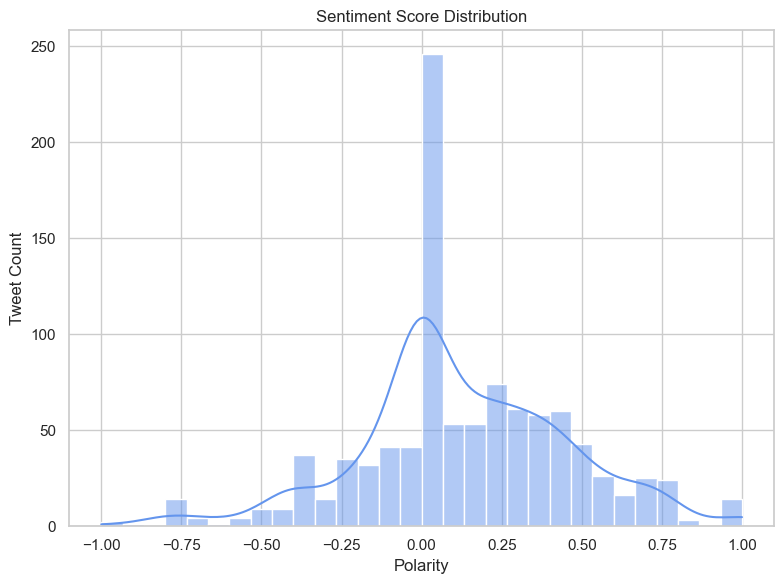

In [14]:
plt.figure(figsize=(8, 6))
sns.histplot(train_df['sentiment_score'], bins=30, kde=True, color='cornflowerblue')
plt.title('Sentiment Score Distribution')
plt.xlabel('Polarity')
plt.ylabel('Tweet Count')
plt.tight_layout()
plt.show()


### Sentiment Category Breakdown

After classifying sentiment polarity scores into categories (`positive`, `negative`, `neutral`), we use a count plot to visualize how many tweets fall into each category.

- The **x-axis** shows the sentiment categories.
- The **y-axis** displays the count of tweets in each category.
- The `palette='Set2'` adds color variation for better readability.
- The plot title includes the number of tweets analyzed, defined by `tweet_limit`.


C:\Users\A\AppData\Local\Temp\ipykernel_18056\2121997231.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x='sentiment_category', palette='Set2')


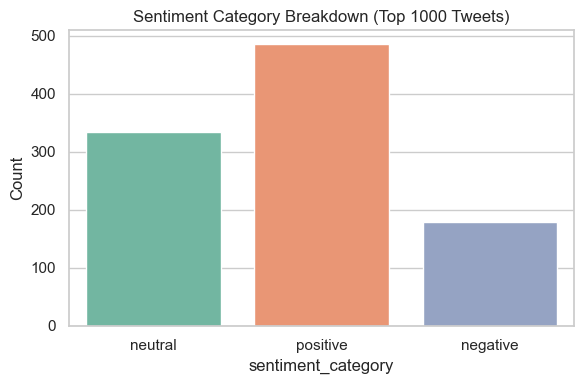

In [15]:
plt.figure(figsize=(6, 4))
sns.countplot(data=train_df, x='sentiment_category', palette='Set2')
plt.title('Sentiment Category Breakdown (Top {} Tweets)'.format(tweet_limit))
plt.ylabel('Count')
plt.tight_layout()
plt.show()


### Topic-Based Sentiment Analysis

To analyze public sentiment on a specific topic (e.g., `"borderlands"`), we filter tweets that mention the keyword and then visualize their sentiment distribution.

---

#### Step: Filter Tweets by Keyword

We use the `str.contains()` method to extract tweets that include a particular keyword, ignoring case.


C:\Users\A\AppData\Local\Temp\ipykernel_18056\378897933.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=topic_tweets, x='sentiment_category', palette='Set3')


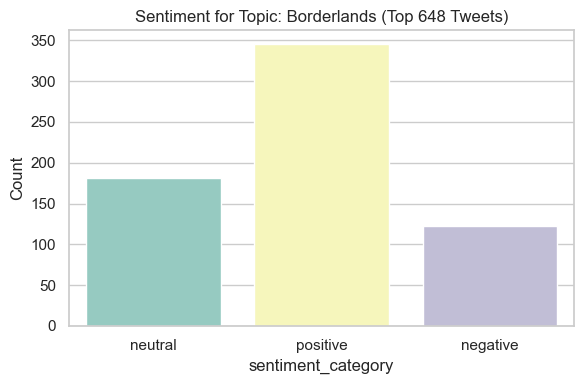

In [16]:
keyword = 'borderlands'  # You can change this to any topic of interest
topic_tweets = train_df[train_df['text'].str.contains(keyword, case=False, na=False)]

plt.figure(figsize=(6, 4))
sns.countplot(data=topic_tweets, x='sentiment_category', palette='Set3')
plt.title(f'Sentiment for Topic: {keyword.capitalize()} (Top {len(topic_tweets)} Tweets)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


---

## Project Objective

The objective of this project was to perform **sentiment analysis on tweets** using the `TextBlob` library. By analyzing the sentiment polarity of each tweet, the goal was to:

- Understand the overall emotional tone present in the dataset.
- Categorize tweets into `positive`, `negative`, or `neutral`.
- Visualize sentiment distribution across the entire dataset and for specific topics.
- Compare predicted sentiment against original labels to assess alignment and model limitations.

This kind of analysis is essential in understanding public opinion, brand perception, or reactions to events, especially when applied to large-scale social media data.

---

## Final Remarks

This project demonstrated the use of natural language processing (NLP) techniques to derive insights from unstructured Twitter data. The sentiment analysis approach using `TextBlob` was simple yet effective for basic polarity scoring and classification. Although more advanced models (like BERT or VADER) can offer better accuracy, this project lays a strong foundation for beginners to explore:

- Preprocessing real-world textual data.
- Applying rule-based sentiment scoring.
- Visualizing results using Python libraries like `matplotlib` and `seaborn`.

Further improvements can include data cleaning, model comparison, and real-time sentiment tracking on specific trends or keywords.

---

##  Author

**Name:** Nitish M.  
**Role:** Undergraduate Student – Data Science

